# Analyzing WTA Matches

In [0]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

## WTA Grand Slam Matches

In [6]:
# list all wta_matches dfs from 1984 to 2018
matches_url = "https://raw.githubusercontent.com/JeffSackmann/tennis_wta/master/wta_matches_{}.csv"
wta_matches_urls = [matches_url.format(year) for year in range(1984,2019)]
# problem with 2012 csv file, requires encoding to loop
dfs_wta = [pd.read_csv(url, encoding = "ISO-8859-1") for url in wta_matches_urls]
# concat all dfs wta
df_matches = pd.concat(dfs_wta, axis=0, sort=False, join='outer')
print(df_matches.shape)
df_matches.sample(5)

(96886, 49)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
917,2016-1051,Stuttgart,Clay,32,I,20160418,294,201493,2,NaN,Angelique Kerber,L,173.0,GER,28.249144,3.0,5740.0,201521,7,NaN,Carla Suarez Navarro,R,162.0,ESP,27.622177,11.0,3160.0,6-2 6-4,3,QF,72.0,3.0,0.0,51.0,35.0,27.0,9.0,9.0,1.0,2.0,0.0,0.0,56.0,38.0,21.0,8.0,9.0,4.0,8.0
2373,2004-W-T3-LUX-01A-2004,Luxembourg,Hard,30,T3,20041025,29,200008,2,NaN,Alicia Molik,R,182.0,AUS,23.742642,14.0,1702.0,201336,NaN,NaN,Dinara Safina,R,182.0,RUS,18.496920,52.0,630.0,6-3 6-4,3,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
817,1997-W-WT-GBR-01A-1997,Cardiff,Clay,32,W,19970513,1,200080,1,NaN,Dominique Monami,R,NaN,BEL,23.947981,29.0,876.0,200031,NaN,NaN,Meilen Tu,R,NaN,USA,19.315537,81.0,306.0,6-3 6-3,3,R32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,2017-1082,Prague,Clay,32,I,20170501,282,201621,NaN,Q,Mona Barthel,R,185.0,GER,26.806297,82.0,737.0,201533,6,NaN,Shuai Zhang,R,NaN,CHN,28.273785,31.0,1510.0,6-0 6-3,3,R32,56.0,5.0,3.0,48.0,33.0,25.0,10.0,8.0,1.0,1.0,0.0,2.0,47.0,31.0,16.0,7.0,7.0,3.0,7.0
509,1996-W-SL-USA-01A-1996,US Open,Hard,128,G,19960826,66,200116,NaN,NaN,Natalia Zvereva,R,NaN,BLR,25.363450,27.0,53.0,200085,NaN,NaN,Ai Sugiyama,R,163.0,JPN,21.144422,26.0,56.0,4-6 6-4 6-3,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# only quarter finalists in grand slams
wta_g = df_matches[df_matches['tourney_level']=='G']
# set year for dataframe
wta_g['t_year'] = wta_g.tourney_date//10000
# convert integer date to proper date format
wta_g['t_date'] = wta_g['tourney_date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
print(wta_g.shape)
wta_g.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(17493, 51)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,t_year,t_date
403,1994-W-SL-USA-01A-1994,US Open,Hard,128,G,19940829,23,200522,NaN,NaN,Nicole Krijger Jagerman,U,NaN,NED,27.101985,95.0,16.0,200697,NaN,NaN,Janette Husarova,R,NaN,SVK,20.235455,96.0,16.0,7-5 6-1,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,1994-08-29
208,1985-W-SL-GBR-01A-1985,Wimbledon,Grass,128,G,19850624,19,200991,NaN,NaN,Joanne Russell,U,NaN,USA,30.650240,NaN,NaN,200449,NaN,NaN,Petra Keppeler,U,NaN,GER,20.257358,NaN,NaN,5-7 6-2 6-1,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,1985-06-24
1625,2018-540,Wimbledon,Grass,128,G,20180702,154,202503,NaN,NaN,Luksika Kumkhum,R,NaN,THA,24.947296,91.0,700.0,211095,NaN,NaN,Bernarda Pera,L,NaN,USA,23.578371,71.0,874.0,4-6 6-2 6-3,3,R128,106.0,2.0,5.0,79.0,51.0,34.0,16.0,14.0,1.0,4.0,4.0,8.0,80.0,47.0,32.0,12.0,13.0,7.0,12.0,2018,2018-07-02
339,1998-W-SL-GBR-01A-1998,Wimbledon,Grass,128,G,19980622,86,200089,NaN,NaN,Miriam Oremans,R,NaN,NED,25.782341,60.0,441.0,200084,NaN,NaN,Asa Svensson,R,NaN,SWE,23.017112,128.0,220.0,6-2 6-3,3,R64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998,1998-06-22
26,1994-W-SL-AUS-01A-1994,Australian Open,Hard,128,G,19940117,27,200669,NaN,NaN,Debbie Graham,R,NaN,USA,23.397673,66.0,22.0,200578,NaN,WC,Rennae Stubbs,R,NaN,AUS,22.814511,181.0,7.0,3-6 7-5 6-0,3,R128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,1994-01-17


In [8]:
# only quarter finalists
wta_g_qf = wta_g[wta_g['round']=='QF']
print(wta_g_qf.shape)
wta_g_qf.sample(5)

(556, 51)


,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,t_year,t_date
120,1997-W-SL-AUS-01A-1997,Australian Open,Hard,128,G,19970113,121,200064,12,NaN,Amanda Coetzer,R,158.0,RSA,25.229295,14.0,1454.0,200660,NaN,NaN,Kimberly Po Messerli,R,NaN,USA,25.234771,23.0,979.0,6-4 6-1,3,QF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,1997-01-13
376,1994-W-SL-GBR-01A-1994,Wimbledon,Grass,128,G,19940620,123,200293,4,NaN,Martina Navratilova,L,173.0,USA,37.670089,4.0,158.0,200539,5,NaN,Jana Novotna,R,NaN,CZE,25.713895,5.0,146.0,5-7 6-0 6-1,3,QF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,1994-06-20
567,1996-W-SL-USA-01A-1996,US Open,Hard,128,G,19960826,124,200652,2,NaN,Monica Seles,L,NaN,USA,22.732375,1.0,358.0,200064,NaN,NaN,Amanda Coetzer,R,158.0,RSA,24.845996,17.0,77.0,6-0 6-3,3,QF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996,1996-08-26
377,1994-W-SL-GBR-01A-1994,Wimbledon,Grass,128,G,19940620,124,200417,NaN,NaN,Gigi Fernandez,U,NaN,USA,30.324435,99.0,16.0,200404,13,NaN,Zina Garrison,U,NaN,USA,30.592745,13.0,84.0,6-4 6-4,3,QF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994,1994-06-20
248,1991-W-SL-FRA-01A-1991,French Open,Clay,128,G,19910527,122,200572,3,NaN,Gabriela Sabatini,R,NaN,ARG,21.029432,3.0,206.0,200539,6,NaN,Jana Novotna,R,NaN,CZE,22.647502,7.0,121.0,5-7 7-6(10) 6-0,3,QF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1991,1991-05-27


In [0]:
# only finalists
wta_g_f = wta_g[wta_g['round']=='F']

# only matches for Serena Williams
df_sw = wta_g_f[(wta_g_f['winner_name']=='Serena Williams')]
# only matches for Venus Williams
df_vw = wta_g_f[(wta_g_f['winner_name']=='Venus Williams')]

In [11]:
# create age mean of grand slam quarterfinalists
age_data = []
for year in range(1984,2019):
  df_year = wta_g_qf[wta_g_qf['t_year']==year]
  age_mean_w = df_year.winner_age.mean()
  age_mean_l = df_year.loser_age.mean()
  age_mean = (age_mean_l+age_mean_w)/2
  age_data.append([df_year.iloc[-1]['t_date'], age_mean])
  
# create dataframe for average quarterfinalists' age
wta_age_qf = pd.DataFrame(age_data,columns=['date','age_mean'])
wta_age_qf

,date,age_mean
0,1984-08-28,23.742642
1,1985-08-27,23.069216
2,1986-08-26,23.673968
3,1987-09-01,24.034052
4,1988-08-29,23.400154
5,1989-08-28,23.369097
6,1990-08-27,21.299025
7,1991-08-26,21.514117
8,1992-08-31,21.478782
9,1993-08-30,22.746920


Text(1981-10-20 00:00:00, 11.5, 'GEORGE HOU                                                            SOURCE: TENNISABSTRACT.COM')

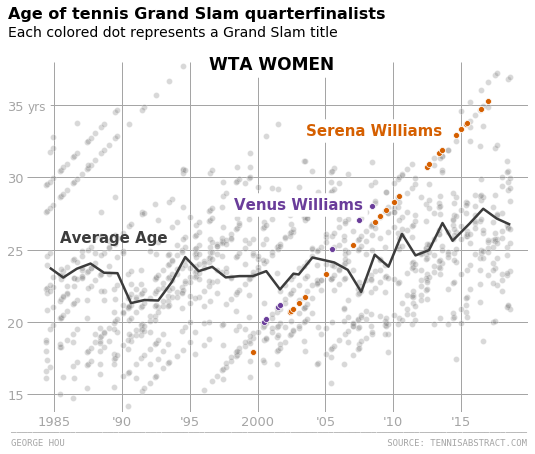

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
# set plot style
plt.style.use('fivethirtyeight')

# Adding the scout changes the xaxis relative to when we don't add the scout
scout = ax.scatter([], [])
scout.remove()

# despine outer frame
sns.despine(left=True, bottom=True)

# set background to white
plt.rcParams['figure.facecolor'] = 'white'
plt.grid(color='#A5A5A5')
ax.set(yticks=range(0, 40, 5), facecolor='white')

# plot for all quarterfinalist age
axw = sns.scatterplot(x="t_date", y="winner_age", alpha=.3,
                      data=wta_g_qf,color='grey')
axl = sns.scatterplot(x="t_date", y="loser_age", alpha=.3,
                      data=wta_g_qf,color='grey')
# plot for Venus Williams age
axw1 = sns.scatterplot(x="t_date", y="winner_age",
                       data=df_vw,color='#6A3D9A')
# plot for Serena Williams age
axw2 = sns.scatterplot(x="t_date", y="winner_age",
                       data=df_sw,color='#D55F00')

# average age mean line 34495E
ax.plot(wta_age_qf.date, wta_age_qf['age_mean'], color='#3C3C3C', lw=2.5)

# set x and y label
ax.set_xlabel('', fontsize=20, color='#A5A5A5')
ax.set_ylabel('', fontsize=20, color='#A5A5A5')

# modify y labels
ax.set_yticks([15, 20,25,30,35])
ax.set_yticklabels(labels=['15','20','25','30','35'], 
                   fontsize=13, color='#A5A5A5')

# modify x labels
ax.set_xticks([pd.to_datetime('1985-1-1'), pd.to_datetime('1990-1-1'), 
               pd.to_datetime('1995-1-1'), pd.to_datetime('2000-1-1'), 
               pd.to_datetime('2005-1-1'), pd.to_datetime('2010-1-1'), 
               pd.to_datetime('2015-1-1')])
ax.set_xticklabels(labels=["1985","'90","'95","2000","'05","'10","'15"], 
                   fontsize=13, color='#A5A5A5')

# set x and y limits
# ax.set_xlim([dt.date(1982, 6, 25), dt.date(2019, 2, 1)])
ax.set_xlim([pd.to_datetime('1983-1-1'), pd.to_datetime('2019-12-31')])
ax.set_ylim([13.8, 38])

# Text for Title
ax.text(x=pd.to_datetime('1981-8-1'), y=41, s="Age of tennis Grand Slam quarterfinalists", 
        fontsize=16, fontweight='bold');

# Text for Subtitle
ax.text(x=pd.to_datetime('1981-8-1'), y=39.8, s="Each colored dot represents a Grand Slam title", 
        fontsize=14);

# text for yrs next to 40
ax.text(x=pd.to_datetime('1983-1-1'), y=34.65, s="yrs", fontsize=12, 
        color='#A5A5A5',backgroundcolor = 'white')

# text for Venus Williams
ax.text(x=pd.to_datetime('1998-3-30'), y=27.8, s="Venus Williams", fontsize=15, 
        color='#6A3D9A', fontweight='semibold',backgroundcolor = 'white')

# text for Serena Williams
ax.text(x=pd.to_datetime('2003-7-20'), y=32.95, s="Serena Williams", fontsize=15, 
        color='#D55F00', fontweight='semibold',backgroundcolor = 'white')

# text for average age
ax.text(x=pd.to_datetime('1985-6-1'), y=25.5, s="Average Age", fontsize=15, 
        color='#3C3C3C', fontweight='semibold')

# text for Women
ax.text(x=pd.to_datetime('1996-6-1'), y=37.5, s="WTA WOMEN", fontsize=17, 
        color='black', fontweight='bold',backgroundcolor = 'white')

# text signature at bottom
ax.text(x =pd.to_datetime('1981-10-20'), y = 12.5,
    s='________________________________________________________________________________________________'
   ,fontsize = 9, family='monospace', color = '#A5A5A5')
ax.text(x =pd.to_datetime('1981-10-20'), y = 11.5,
    s='GEORGE HOU                                                            SOURCE: TENNISABSTRACT.COM'
   ,fontsize = 9, family='monospace', color = '#A5A5A5')